In this assignment, you’ll be using the (binary) results of the 2011 ATP men’s tennis singles for 107 players
in a total of 1801 games (which these players played against each other in the 2011 season), to compute
probabilistic rankings of the skills of these players.

(Alternative to this assignment you can develop an prediction model for the credit assignment data set.)

#### Data

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
import pymc
import operator

In [2]:
tennis_players = np.load("./tennis_players.npy")
nb_tennis_players = len(tennis_players)
nb_tennis_players

107

In [3]:
tennis_players[0]

u'Rafael-Nadal'

In [4]:
tennis_games = np.load("./tennis_games.npy")

tennis_games is a 1801 by 2 matrix of the played games, one row per
game: the first column is the identity of the player who won the game, and the second column contains the
identity of the player who lost. 

#### Assignment

1. Use pymc to develop a probabilistic ranking system. The model should assign each player a score. 
2. Plot the ranking accoring to your (learnt) model.
3. Write a function which get's as input the ids of two player and prints (or returns) a prediction of the probabilities that player 1 resp. player 2 wins.
e.g.:
       > print_prediction(10, 12)   
       
       Andy-Murray: 0.56
       David-Nalbandian: 0.44

In [5]:
map_winners = map(lambda x : x[0], tennis_games)
#http://www.python-kurs.eu/lambda.php
wins_per_player = np.bincount(map_winners)
wins_per_player

array([57, 22, 35, 32, 58, 45, 12, 34, 22, 21, 47, 29, 16,  9, 22, 67, 24,
       19, 15, 20, 26, 15, 16, 31, 29, 33, 17, 10, 27, 50, 15, 29, 29, 41,
       12, 17,  8, 16,  4, 17, 17, 29, 36, 15, 15, 19, 25, 37, 17,  5, 13,
        9, 19,  7, 14, 10,  6, 12,  5, 15, 12, 14, 26, 12, 17, 15,  7,  8,
       23, 12,  4, 12, 12, 13,  3, 16, 14, 13, 17, 29,  8, 18,  2, 12,  9,
        5, 15,  4,  4, 12, 16,  7, 10,  8, 11,  5,  0,  0,  0,  1,  1,  0,
        0,  0,  1])

In [14]:
map_losers = map(lambda x : x[1], tennis_games)
losses_per_player = np.bincount(map_losers)
losses_per_player

array([15, 24, 19, 25, 12, 24, 24, 22, 16, 25, 12, 18, 12, 14, 16,  7, 23,
       24, 22, 23, 18, 21, 17,  9, 24, 23, 22, 21, 16, 19, 24, 20, 26, 22,
       19, 16, 16, 16, 10, 19, 22, 25, 22, 26,  8, 23, 17, 26, 25,  8, 25,
       26, 23, 23, 21, 22,  9,  9,  9, 24, 20, 15, 25, 16, 20, 17, 18, 21,
       26, 11, 10, 15, 20, 23, 13, 24, 20, 26, 20, 25, 21, 25,  6, 21, 19,
       12, 17,  9, 11, 21, 23, 12, 16, 13, 16,  5,  3,  2,  1,  1,  1,  4,
        1,  1,  5,  1,  1])

In [15]:
games_played = wins_per_player + losses_per_player
games_played

ValueError: operands could not be broadcast together with shapes (105,) (107,) 

In [16]:
players = {}
for w, l in tennis_games:
    if(w in players):
        winner = players[w]
    else:
        winner = (0,0)
        
    winner = (winner[0] + 1, winner[1])
    players[w] = winner
    
    if(l in players):
        loser = players[l]
    else:
        loser = (0,0)
        
    loser = (loser[0], loser[1] + 1)
    players[l] = loser
    
players
            

{0: (57, 15),
 1: (22, 24),
 2: (35, 19),
 3: (32, 25),
 4: (58, 12),
 5: (45, 24),
 6: (12, 24),
 7: (34, 22),
 8: (22, 16),
 9: (21, 25),
 10: (47, 12),
 11: (29, 18),
 12: (16, 12),
 13: (9, 14),
 14: (22, 16),
 15: (67, 7),
 16: (24, 23),
 17: (19, 24),
 18: (15, 22),
 19: (20, 23),
 20: (26, 18),
 21: (15, 21),
 22: (16, 17),
 23: (31, 9),
 24: (29, 24),
 25: (33, 23),
 26: (17, 22),
 27: (10, 21),
 28: (27, 16),
 29: (50, 19),
 30: (15, 24),
 31: (29, 20),
 32: (29, 26),
 33: (41, 22),
 34: (12, 19),
 35: (17, 16),
 36: (8, 16),
 37: (16, 16),
 38: (4, 10),
 39: (17, 19),
 40: (17, 22),
 41: (29, 25),
 42: (36, 22),
 43: (15, 26),
 44: (15, 8),
 45: (19, 23),
 46: (25, 17),
 47: (37, 26),
 48: (17, 25),
 49: (5, 8),
 50: (13, 25),
 51: (9, 26),
 52: (19, 23),
 53: (7, 23),
 54: (14, 21),
 55: (10, 22),
 56: (6, 9),
 57: (12, 9),
 58: (5, 9),
 59: (15, 24),
 60: (12, 20),
 61: (14, 15),
 62: (26, 25),
 63: (12, 16),
 64: (17, 20),
 65: (15, 17),
 66: (7, 18),
 67: (8, 21),
 68: (2

In [17]:
players = dict(map(lambda(k,v): (k, (v[0], v[1], v[0]+v[1])), players.iteritems() ))
players

{0: (57, 15, 72),
 1: (22, 24, 46),
 2: (35, 19, 54),
 3: (32, 25, 57),
 4: (58, 12, 70),
 5: (45, 24, 69),
 6: (12, 24, 36),
 7: (34, 22, 56),
 8: (22, 16, 38),
 9: (21, 25, 46),
 10: (47, 12, 59),
 11: (29, 18, 47),
 12: (16, 12, 28),
 13: (9, 14, 23),
 14: (22, 16, 38),
 15: (67, 7, 74),
 16: (24, 23, 47),
 17: (19, 24, 43),
 18: (15, 22, 37),
 19: (20, 23, 43),
 20: (26, 18, 44),
 21: (15, 21, 36),
 22: (16, 17, 33),
 23: (31, 9, 40),
 24: (29, 24, 53),
 25: (33, 23, 56),
 26: (17, 22, 39),
 27: (10, 21, 31),
 28: (27, 16, 43),
 29: (50, 19, 69),
 30: (15, 24, 39),
 31: (29, 20, 49),
 32: (29, 26, 55),
 33: (41, 22, 63),
 34: (12, 19, 31),
 35: (17, 16, 33),
 36: (8, 16, 24),
 37: (16, 16, 32),
 38: (4, 10, 14),
 39: (17, 19, 36),
 40: (17, 22, 39),
 41: (29, 25, 54),
 42: (36, 22, 58),
 43: (15, 26, 41),
 44: (15, 8, 23),
 45: (19, 23, 42),
 46: (25, 17, 42),
 47: (37, 26, 63),
 48: (17, 25, 42),
 49: (5, 8, 13),
 50: (13, 25, 38),
 51: (9, 26, 35),
 52: (19, 23, 42),
 53: (7, 23,

In [18]:
#provisional player score based on number of wins divided by number of games played
players = dict(map(lambda(k,v): (k, (v[0], v[1], v[2], operator.truediv(v[0], v[2]))), players.iteritems() ))
#add names to dictionary
players = dict(map(lambda(k,v): (k, (v[0], v[1], v[2], v[3], tennis_players[k])), players.iteritems() ))
players
#wtf is the u doing in front of players's names

{0: (57, 15, 72, 0.7916666666666666, u'Rafael-Nadal'),
 1: (22, 24, 46, 0.4782608695652174, u'Juan-Monaco'),
 2: (35, 19, 54, 0.6481481481481481, u'Juan-Martin-Del-Potro'),
 3: (32, 25, 57, 0.5614035087719298, u'Mardy-Fish'),
 4: (58, 12, 70, 0.8285714285714286, u'Roger-Federer'),
 5: (45, 24, 69, 0.6521739130434783, u'Jo-Wilfried-Tsonga'),
 6: (12, 24, 36, 0.3333333333333333, u'Guillermo-Garcia-Lopez'),
 7: (34, 22, 56, 0.6071428571428571, u'Florian-Mayer'),
 8: (22, 16, 38, 0.5789473684210527, u'Milos-Raonic'),
 9: (21, 25, 46, 0.45652173913043476, u'Santiago-Giraldo'),
 10: (47, 12, 59, 0.7966101694915254, u'Andy-Murray'),
 11: (29, 18, 47, 0.6170212765957447, u'Richard-Gasquet'),
 12: (16, 12, 28, 0.5714285714285714, u'David-Nalbandian'),
 13: (9, 14, 23, 0.391304347826087, u'Gilles-Muller'),
 14: (22, 16, 38, 0.5789473684210527, u'Andy-Roddick'),
 15: (67, 7, 74, 0.9054054054054054, u'Novak-Djokovic'),
 16: (24, 23, 47, 0.5106382978723404, u'Fernando-Verdasco'),
 17: (19, 24, 43, 

In [19]:
def print_prediction(p1, p2):
    "Takes IDs of two players. prints player names and score. Higher score means better chances to win match."
    print players.values()[p1][4]
    print players.values()[p1][3]
    print
    print players.values()[p2][4]
    print players.values()[p2][3]
    return

print_prediction(1, 7)

Juan-Monaco
0.478260869565

Florian-Mayer
0.607142857143


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


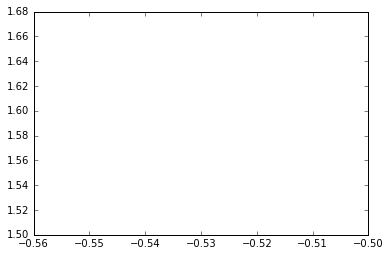

theta:  0.370799836896
 [-----------------100%-----------------] 11000 of 11000 complete in 1.3 secPlotting alpha


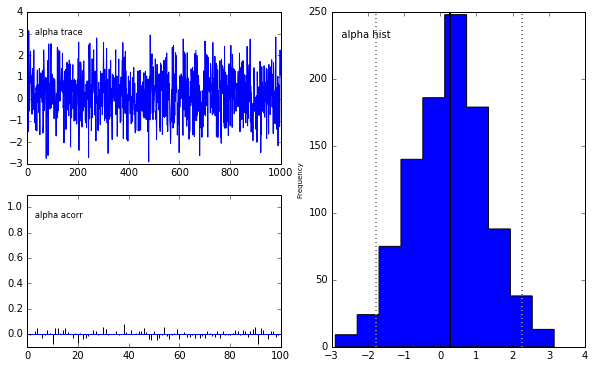

In [67]:
#http://people.duke.edu/~ccc14/sta-663/PyMC2.html?highlight=invlogit
#http://bagrow.com/ds2/LEC20_notes_2014-11-04.html

def get_observed_data(player_number):
    #data = np.array(players.values()[player_number][2])
    dataWins = np.ones(players[player_number][0])
    dataLosses = np.zeros(players[player_number][1])
    data = np.concatenate([dataWins, dataLosses])
    return data

#observed data
# n = number of matches played (per player)
n = 72
# x = log of number of wins
x = 57
# y_obs = observed data
y_obs = get_observed_data(0)
print y_obs

    
#define priors
alpha = pymc.Normal('alpha', mu=0.25, tau=1.)
beta = pymc.Normal('beta', mu=0.75, tau=1.)
plt.plot(alpha, beta)
plt.show()

#define likelihood
theta = pymc.invlogit(alpha)
print "theta: ", theta
y = pymc.Binomial('y_obs', n=n, p=theta, value=y_obs, observed=True)

#inference
m = pymc.Model([alpha, y])
mc = pymc.MCMC(m)
sample = mc.sample(iter=11000, burn=10000)
pymc.Matplot.plot(mc)